In [1]:
import numpy as np 
from numpy.random import default_rng
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl 
import math
import random
from scipy.stats import multivariate_normal
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
def risk(i , x , loss_matrix, sample_info):
    risk = 0
    for j, row in sample_info.iterrows():
        #  Probability, mu, sigma^2
        #print(j)
        if(i==j):
            continue
        #print(loss_matrix[i][j])
        # pdf_value = multivariate_normal.pdf(x, row['mu'], row['cov'])

        # print(multivariate_normal.pdf(x,row['mu'],row['cov']))
        risk = risk + loss_matrix[i][j]*row['P']*multivariate_normal.pdf(x,row['mu'],row['cov'])
        #print(risk)
    return risk

In [3]:
sample_info = pd.DataFrame(columns=['P','mean','conv'])
# Class 1
cp_1 = 0.3
# First Gaussian
mean_1  = [1,1,1]
conv_1 = [[0.5, 0,   1  ],
        [0,   2,   0  ],
        [0,   0.5, 0.5]]
d = {'P':cp_1,'mu':mean_1,'cov':conv_1}
d_df = pd.DataFrame([d])
sample_info = pd.concat([sample_info, d_df], ignore_index=True)
# Class 2
cp_2 = 0.3
# Second Guassian
mean_2  = [1,1,2]
conv_2 = [[1,   0,   1  ],
        [0,   1,   0  ],
        [0,   0.5, 1  ]]
d = {'P':cp_2,'mu':mean_2,'cov':conv_2}
d_df = pd.DataFrame([d])
sample_info = pd.concat([sample_info, d_df], ignore_index=True)
# sample_info = sample_info.append(d,ignore_index=True)
# Class 3
cp_3 = 0.4
# Third Gaussian
mean_3a  = [1,2,2]
conv_3a = [[3,   0,   0  ],
        [0,   1,   0  ],
        [0,   0,   0.5]]
d = {'P':(cp_3/2),'mu':mean_3a,'cov':conv_3a}
d_df = pd.DataFrame([d])

sample_info = pd.concat([sample_info, d_df], ignore_index=True)
# sample_info = sample_info.append(d,ignore_index=True)
# Fourth Gaussian
mean_3b  = [1,2,1]
conv_3b = [[1,   0,   1  ],
        [0,   1,   0  ],
        [0,   0,   2  ]]
d = {'P':(cp_3/2),'mu':mean_3b,'cov':conv_3b}

d_df = pd.DataFrame([d])
sample_info = pd.concat([sample_info, d_df], ignore_index=True)
loss_matrix=[[0,1,1,1],
             [1,0,1,1],
             [1,1,0,1],
             [1,1,1,0]]
loss_data_matrix_10 = [[0,   1,   10  , 10],
                    [1,   0,   10  , 10],
                    [1,   1,   0   , 0 ],
                    [1,   1,   0   , 0 ]]
loss_data_matrix_100 = [[0,   1,  100  , 100],
                    [1,   0,  100  , 100],
                    [1,   1,  0    , 0  ],
                    [1,   1,  0    , 0  ]]


In [4]:
samples = pd.read_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_2\PART_B\samples_a.csv',index_col=0)
choices  = []
correct = []
for idx, row in samples.iterrows():
    # Modify class label for computation
    distribution = int(row['True Class Label'])
    choice = np.argmin([risk(0,[row['x'],row['y'],row['z']],loss_matrix,sample_info), risk(1,[row['x'],row['y'],row['z']],loss_matrix,sample_info), 
                        risk(2,[row['x'],row['y'],row['z']],loss_matrix,sample_info), risk(3,[row['x'],row['y'],row['z']],loss_matrix,sample_info)])
    # Make sure 3a and 3b are together
    if(choice==0):
        choices.append(1) 
        choice = 1
    elif(choice==1):
        choices.append(2)
        choice = 2
    else:
        choices.append(3)
        choice = 3
    # Check if classification was correct or not
    if(choice==distribution):
        correct.append(True)
    else:
        correct.append(False)
samples['ERM Classification'] = choices
samples['Correct']            = correct
samples.to_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_2\PART_B\samples_b_10.csv')

In [5]:
samples_10 = pd.read_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_2\PART_B\samples_b_10.csv',index_col=0)
choices  = []
correct = []
for idx, row in samples_10.iterrows():
    # Modify class label for computation
    distribution = int(row['True Class Label'])
    choice = np.argmin([risk(0,[row['x'],row['y'],row['z']],loss_data_matrix_10,sample_info), risk(1,[row['x'],row['y'],row['z']],loss_matrix,sample_info), 
                        risk(2,[row['x'],row['y'],row['z']],loss_data_matrix_10,sample_info), risk(3,[row['x'],row['y'],row['z']],loss_matrix,sample_info)])
    # Make sure 3a and 3b are together
    if(choice==0):
        choices.append(1) 
        choice = 1
    elif(choice==1):
        choices.append(2)
        choice = 2
    else:
        choices.append(3)
        choice = 3
    # Check if classification was correct or not
    if(choice==distribution):
        correct.append(True)
    else:
        correct.append(False)
samples_10['ERM Classification'] = choices
samples_10['Correct']            = correct
samples_10.to_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_2\PART_B\samples_b_10.csv')

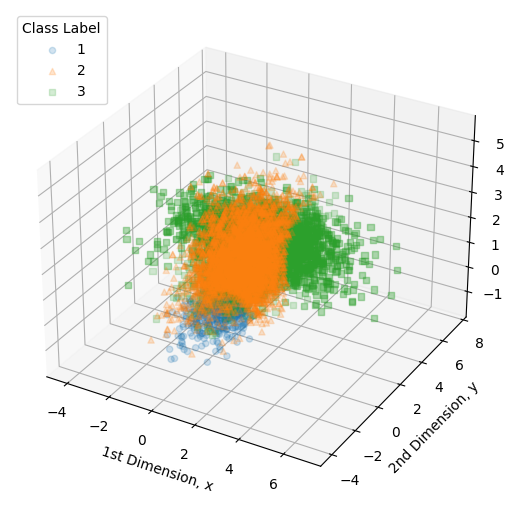

In [6]:
samples_10 = pd.read_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_2\PART_B\samples_b_10.csv',index_col=0)
fig = plt.figure(figsize = (5, 5))
fig.subplots_adjust(left=0.01, right=0.985, top=0.99, bottom=0.01, wspace=0)
ax = plt.axes(projection ="3d")
samples_1 = samples_10[samples_10['ERM Classification']==1]
samples_2 = samples_10[samples_10['ERM Classification']==2]
samples_3 = samples_10[samples_10['ERM Classification']==3]
x_1 = samples_1['x'].tolist()
y_1 = samples_1['y'].tolist()
z_1 = samples_1['z'].tolist()
x_2 = samples_2['x'].tolist()
y_2 = samples_2['y'].tolist()
z_2 = samples_2['z'].tolist()
x_3 = samples_3['x'].tolist()
y_3 = samples_3['y'].tolist()
z_3 = samples_3['z'].tolist()
ax.scatter3D(x_1, y_1, z_1, label='1', marker='o', alpha=0.2)
ax.scatter3D(x_2, y_2, z_2, label='2', marker='^', alpha=0.2)
ax.scatter3D(x_3, y_3, z_3, label='3', marker='s', alpha=0.2)
#ax.set_title("Samples from Multivariate Gaussian Distributions")
ax.set_xlabel('1st Dimension, x')
ax.set_ylabel('2nd Dimension, y')
ax.set_zlabel('3rd Dimension, z')
ax.legend(loc='upper left', title='Class Label')
save_path=r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_2\PART_B\samples_classified_scatterplot_10.png'
plt.savefig(save_path)


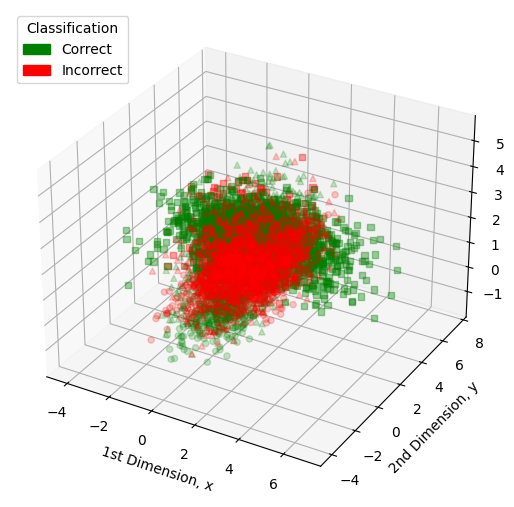

In [7]:
samples_10 = pd.read_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_2\PART_B\samples_b_10.csv',index_col=0)
fig = plt.figure(figsize = (5,5))
fig.subplots_adjust(left=0.01, right=0.985, top=0.99, bottom=0.01, wspace=0)
ax = plt.axes(projection ="3d")
# Plot correct
correct = samples_10[samples_10['Correct']==True]
samples_1 = correct[correct['True Class Label']==1]
samples_2 = correct[correct['True Class Label']==2]
samples_3 = correct[correct['True Class Label']==3]
x_1 = samples_1['x'].tolist()
y_1 = samples_1['y'].tolist()
z_1 = samples_1['z'].tolist()
x_2 = samples_2['x'].tolist()
y_2 = samples_2['y'].tolist()
z_2 = samples_2['z'].tolist()
x_3 = samples_3['x'].tolist()
y_3 = samples_3['y'].tolist()
z_3 = samples_3['z'].tolist()
ax.scatter3D(x_1, y_1, z_1, label='1', marker='o', alpha=0.2, color='green')
ax.scatter3D(x_2, y_2, z_2, label='2', marker='^', alpha=0.2, color='green')
ax.scatter3D(x_3, y_3, z_3, label='3', marker='s', alpha=0.2, color='green')
# Plot incorrect
correct = samples[samples['Correct']==False]
samples_1 = correct[correct['True Class Label']==1]
samples_2 = correct[correct['True Class Label']==2]
samples_3 = correct[correct['True Class Label']==3]
x_1 = samples_1['x'].tolist()
y_1 = samples_1['y'].tolist()
z_1 = samples_1['z'].tolist()
x_2 = samples_2['x'].tolist()
y_2 = samples_2['y'].tolist()
z_2 = samples_2['z'].tolist()
x_3 = samples_3['x'].tolist()
y_3 = samples_3['y'].tolist()
z_3 = samples_3['z'].tolist()
ax.scatter3D(x_1, y_1, z_1, label='1', marker='o', alpha=0.2, color='red')
ax.scatter3D(x_2, y_2, z_2, label='2', marker='^', alpha=0.2, color='red')
ax.scatter3D(x_3, y_3, z_3, label='3', marker='s', alpha=0.2, color='red')
ax.set_xlabel('1st Dimension, x')
ax.set_ylabel('2nd Dimension, y')
ax.set_zlabel('3rd Dimension, z')
#ax.get_legend().remove()
green_patch = mpatches.Patch(color='green', label='Correct')
red_patch = mpatches.Patch(color='red', label='Incorrect')
ax.legend(handles=[green_patch, red_patch], loc='upper left', title='Classification')
save_path=r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_2\PART_B\samples_correct_classified_scatterplot_10.png'
plt.savefig(save_path)

[[0.13890718 0.37393022 0.48716261]
 [0.03551724 0.67275862 0.29172414]
 [0.00096015 0.28180509 0.71723476]]


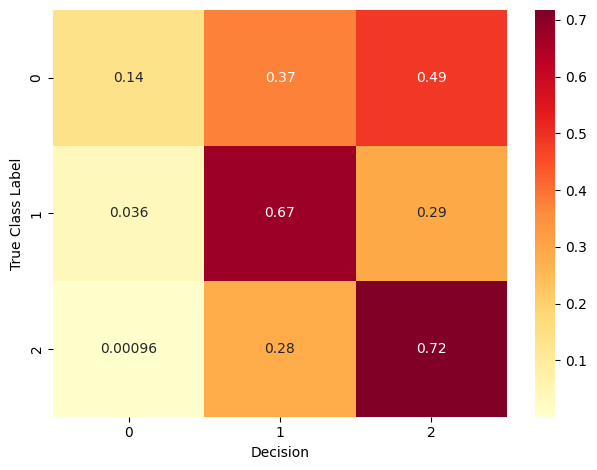

In [8]:
samples_10 = pd.read_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_2\PART_B\samples_b_10.csv')
pred = samples_10['ERM Classification'].tolist()
act  = samples_10['True Class Label'].tolist()
confusion = confusion_matrix(act, pred, normalize='true')
print(confusion)
sns.heatmap(data=confusion,cmap="YlOrRd",annot=True,)
plt.xlabel('Decision')
plt.ylabel('True Class Label')
plt.tight_layout()
plt.savefig(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_2\PART_B\decision_matrix_10.png')

In [9]:
samples_100 = pd.read_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_2\PART_B\samples_a.csv',index_col=0)
choices  = []
correct = []

for idx, row in samples.iterrows():
    # Modify class label for computation
    distribution = int(row['True Class Label'])
    choice = np.argmin([risk(0,[row['x'],row['y'],row['z']],loss_data_matrix_100,sample_info), risk(1,[row['x'],row['y'],row['z']],loss_data_matrix_100,sample_info), 
                            risk(2,[row['x'],row['y'],row['z']],loss_data_matrix_100,sample_info), risk(3,[row['x'],row['y'],row['z']],loss_data_matrix_100,sample_info)])
    # Make sure 3a and 3b are together
    if(choice==0):
        choices.append(1) 
        choice = 1
    elif(choice==1):
        choices.append(2)
        choice = 2
    else:
        choices.append(3)
        choice = 3
    # Check if classification was correct or not
    if(choice==distribution):
        correct.append(True)
    else:
        correct.append(False)
samples_100['ERM Classification'] = choices
samples_100['Correct']            = correct
samples_100.to_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_2\PART_B\samples_b_100.csv')

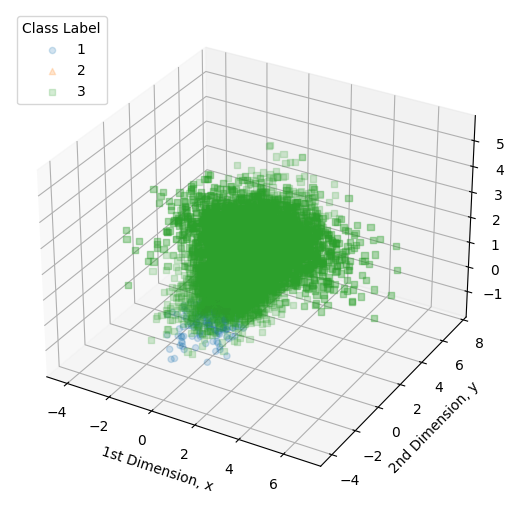

In [10]:
samples_100 = pd.read_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_2\PART_B\samples_b_100.csv',index_col=0)
fig = plt.figure(figsize = (5, 5))
fig.subplots_adjust(left=0.01, right=0.985, top=0.99, bottom=0.01, wspace=0)
ax = plt.axes(projection ="3d")
samples_1 = samples_100[samples_100['ERM Classification']==1]
samples_2 = samples_100[samples_100['ERM Classification']==2]
samples_3 = samples_100[samples_100['ERM Classification']==3]
x_1 = samples_1['x'].tolist()
y_1 = samples_1['y'].tolist()
z_1 = samples_1['z'].tolist()
x_2 = samples_2['x'].tolist()
y_2 = samples_2['y'].tolist()
z_2 = samples_2['z'].tolist()
x_3 = samples_3['x'].tolist()
y_3 = samples_3['y'].tolist()
z_3 = samples_3['z'].tolist()
ax.scatter3D(x_1, y_1, z_1, label='1', marker='o', alpha=0.2)
ax.scatter3D(x_2, y_2, z_2, label='2', marker='^', alpha=0.2)
ax.scatter3D(x_3, y_3, z_3, label='3', marker='s', alpha=0.2)
#ax.set_title("Samples from Multivariate Gaussian Distributions")
ax.set_xlabel('1st Dimension, x')
ax.set_ylabel('2nd Dimension, y')
ax.set_zlabel('3rd Dimension, z')
ax.legend(loc='upper left', title='Class Label')
save_path=r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_2\PART_B\samples_classified_scatterplot_100.png'
plt.savefig(save_path)


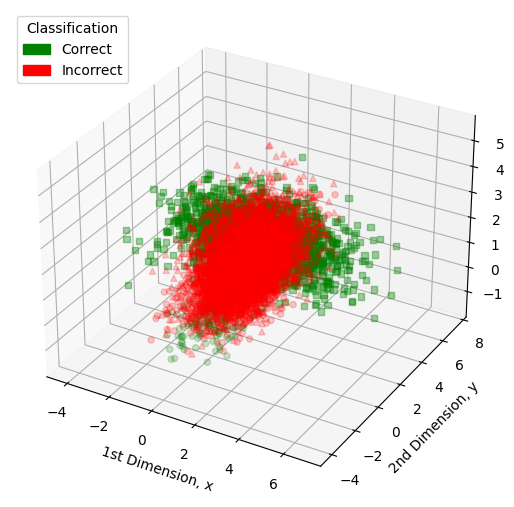

In [11]:
samples = pd.read_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_2\PART_B\samples_b_100.csv',index_col=0)
fig = plt.figure(figsize = (5,5))
fig.subplots_adjust(left=0.01, right=0.985, top=0.99, bottom=0.01, wspace=0)
ax = plt.axes(projection ="3d")
# Plot correct
correct = samples[samples['Correct']==True]
samples_1 = correct[correct['True Class Label']==1]
samples_2 = correct[correct['True Class Label']==2]
samples_3 = correct[correct['True Class Label']==3]
x_1 = samples_1['x'].tolist()
y_1 = samples_1['y'].tolist()
z_1 = samples_1['z'].tolist()
x_2 = samples_2['x'].tolist()
y_2 = samples_2['y'].tolist()
z_2 = samples_2['z'].tolist()
x_3 = samples_3['x'].tolist()
y_3 = samples_3['y'].tolist()
z_3 = samples_3['z'].tolist()
ax.scatter3D(x_1, y_1, z_1, label='1', marker='o', alpha=0.2, color='green')
ax.scatter3D(x_2, y_2, z_2, label='2', marker='^', alpha=0.2, color='green')
ax.scatter3D(x_3, y_3, z_3, label='3', marker='s', alpha=0.2, color='green')
# Plot incorrect
correct = samples[samples['Correct']==False]
samples_1 = correct[correct['True Class Label']==1]
samples_2 = correct[correct['True Class Label']==2]
samples_3 = correct[correct['True Class Label']==3]
x_1 = samples_1['x'].tolist()
y_1 = samples_1['y'].tolist()
z_1 = samples_1['z'].tolist()
x_2 = samples_2['x'].tolist()
y_2 = samples_2['y'].tolist()
z_2 = samples_2['z'].tolist()
x_3 = samples_3['x'].tolist()
y_3 = samples_3['y'].tolist()
z_3 = samples_3['z'].tolist()
ax.scatter3D(x_1, y_1, z_1, label='1', marker='o', alpha=0.2, color='red')
ax.scatter3D(x_2, y_2, z_2, label='2', marker='^', alpha=0.2, color='red')
ax.scatter3D(x_3, y_3, z_3, label='3', marker='s', alpha=0.2, color='red')
ax.set_xlabel('1st Dimension, x')
ax.set_ylabel('2nd Dimension, y')
ax.set_zlabel('3rd Dimension, z')
#ax.get_legend().remove()
green_patch = mpatches.Patch(color='green', label='Correct')
red_patch = mpatches.Patch(color='red', label='Incorrect')
ax.legend(handles=[green_patch, red_patch], loc='upper left', title='Classification')
save_path=r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_2\PART_B\samples_correct_classified_scatterplot_b_100.png'
plt.savefig(save_path)


[[4.83870968e-02 0.00000000e+00 9.51612903e-01]
 [6.89655172e-03 0.00000000e+00 9.93103448e-01]
 [4.80076812e-04 0.00000000e+00 9.99519923e-01]]


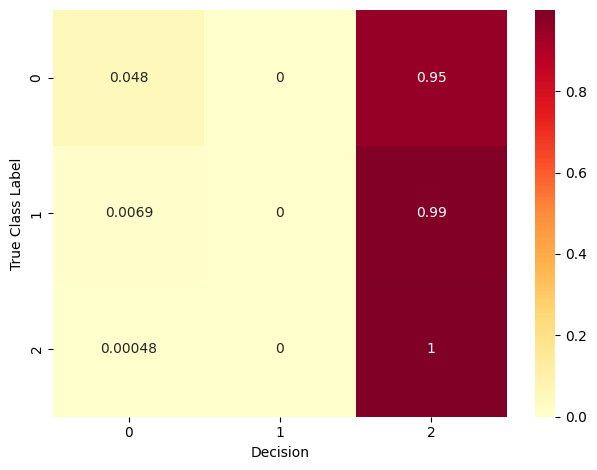

In [12]:
samples_100 = pd.read_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_2\PART_B\samples_b_100.csv')
pred = samples_100['ERM Classification'].tolist()
act  = samples_100['True Class Label'].tolist()
confusion = confusion_matrix(act, pred, normalize='true')
print(confusion)
sns.heatmap(data=confusion,cmap="YlOrRd",annot=True,)
plt.xlabel('Decision')
plt.ylabel('True Class Label')
plt.tight_layout()
plt.savefig(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_2\PART_B\decision_matrix_100.png')